[ 10.          12.77777778  15.55555556  18.33333333  21.11111111
  23.88888889  26.66666667  29.44444444  32.22222222  35.        ]
[   0.           10.52631579   21.05263158   31.57894737   42.10526316
   52.63157895   63.15789474   73.68421053   84.21052632   94.73684211
  105.26315789  115.78947368  126.31578947  136.84210526  147.36842105
  157.89473684  168.42105263  178.94736842  189.47368421  200.        ]


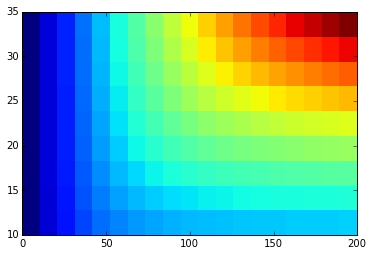

In [20]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

Vp0 = 1.0
PhyIS = 0.025
T = np.linspace(10, 35, 10)
#T = 20
print T

PAR = np.linspace(0, 200, 20)
print PAR

#Vp = np.array(size=[len(T)])
#fac1 = np.array(size=[len(PAR)])

Vp = Vp0 * 0.59 * (1.066 ** T)
fac1 = PAR * PhyIS
Epp = np.zeros(shape=[10,20])
for i, v in enumerate(Vp):
    for j, f in enumerate(fac1):
        Epp[i, j] = v / np.sqrt(v * v + f * f)
        
t_PPmax = Epp * fac1
#print t_PPmax

plt.pcolor(PAR, T, t_PPmax)

<matplotlib.colorbar.Colorbar instance at 0x10af5b908>

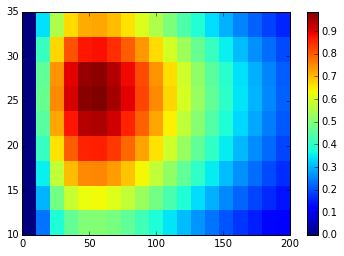

In [42]:
beta1 = 0.003
beta2 = 0.006
t_opt = 25.0
I_opt = 46.60
ke = 0.01
H = 10
g_max = 3.0

T = np.linspace(10, 35, 10)
PAR = np.linspace(0, 200, 20)

Gt = np.zeros(shape=[10])
for i, t in enumerate(T):
    if t <= t_opt:
        Gt[i] = np.exp(-beta1 * (t - t_opt) ** 2)
    else:
        Gt[i] = np.exp(-beta2 * (t_opt - t) ** 2)

GI = 2.7 / ke / H * (np.exp(-PAR / I_opt * np.exp(-ke * H)) - np.exp(-PAR / I_opt))

G = np.zeros(shape=[10, 20])
for i in range(10):
    for j in range(20):
        G[i, j] = Gt[i] * GI[j]
plt.pcolor(PAR, T, G)
plt.colorbar()

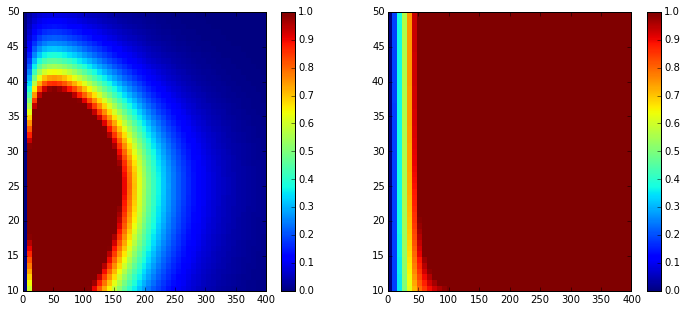

In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt


def simple(T, PAR, Chlo, H):
    AttSW = 0.04
    AttChl = 0.017
    g_max = 3.0
    t_opt = 25.0
    I_opt = 45.60
    beta1 =0.003
    beta2 = 0.006
    
    Att =(AttSW+AttChl*Chlo)*H/2
    
    cff=(T-t_opt)**2.0
    if T <= t_opt:
        fac1=np.exp(-beta1*cff)
    else:
        fac1=np.exp(-beta2*cff)
    cff=PAR/I_opt
    fac2=np.exp(1.0)/Att*(np.exp(-cff*np.exp(-Att))-np.exp(-cff))
    #fac2=np.exp(1.0)
    #return fac2
    return g_max*fac1*fac2

def original(T, PAR, Chlo, H):
    AttSW = 0.04
    AttChl = 0.017
    Vp0 = 1.0
    PhyIS = 0.025

    Att =(AttSW+AttChl*Chlo)*H
    ExpAtt=np.exp(-Att)
    Itop=PAR
    PAR=Itop*(1.0-ExpAtt)/Att

    Vp=Vp0*0.59*(1.066**T)
    fac1=PAR*PhyIS
    Epp=Vp/np.sqrt(Vp*Vp+fac1*fac1)
    return Epp*fac1

    
T = np.linspace(10,50,50)
PAR = np.linspace(0,400,50)
Chlo = 1.0
H = 3.0
Pmax = [np.zeros(shape=[len(T),len(PAR)]) for _ in range(2)]
for i, t in enumerate(T):
    for j, p in enumerate(PAR):
        Pmax[0][i,j] = simple(t, p, Chlo, H)
        Pmax[1][i,j] = original(t, p, Chlo, H)

fig, ax = plt.subplots(1,2,figsize=[12,5])
for i in range(2):
    pc = ax[i].pcolor(PAR,T,Pmax[i], vmin=0.0, vmax=1.0)
    plt.colorbar(pc, ax=ax[i])